In [1]:
!git clone -b janina https://github.com/inttx/DLAM_SealedSurfaces.git
%cd DLAM_SealedSurfaces

Cloning into 'DLAM_SealedSurfaces'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 71), reused 77 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (124/124), 163.94 KiB | 6.83 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/home/janina/PycharmProjects/DLAM_SealedSurfaces/DLAM_SealedSurfaces


In [1]:
!pip install -r requirements.txt
%cd src


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
/home/janina/PycharmProjects/DLAM_SealedSurfaces/src


In [2]:
from settings import *
from dataset import PotsdamDataset, get_data_loaders
from models import get_trained_custom_resnet18, get_trained_deeplabv3_resnet101, get_trained_segformer_model
from eval import evaluate_segmentation

In [3]:
try:
    import os
    import shutil
    from google.colab import drive
    MOUNTPOINT = '/content/drive/'
    drive.mount(MOUNTPOINT)

    IMAGE_PATH = os.path.join(MOUNTPOINT, 'MyDrive', 'DLAM', '2_Ortho_RGB') # TODO adjust to your path
    LABEL_PATH = os.path.join(MOUNTPOINT, 'MyDrive', 'DLAM', '5_Labels_all') # TODO adjust to your path

    EVAL_PATH = MOUNTPOINT + 'MyDrive/DLAM/eval/'
except:
    IMAGE_PATH = '../data/2_Ortho_RGB' # TODO adjust to your path
    LABEL_PATH = '../data/5_Labels_all' # TODO adjust to your path
    EVAL_PATH = '../eval/'
os.makedirs(EVAL_PATH, exist_ok=True)

In [4]:
# Hyperparameters
patch_size = 250
stride = 250
batch_size = 8
num_classes = 6

# Train resnet18

In [5]:
dataset = PotsdamDataset(IMAGE_PATH, LABEL_PATH, patch_size=patch_size, stride=stride, device=DEVICE)
train_loader, val_loader, test_loader = get_data_loaders(dataset, [0.8, 0.1, 0.1] ,batch_size)

model = get_trained_custom_resnet18(model_path='../models/resnet18.pth', patch_size=patch_size, num_classes=num_classes, device=DEVICE)
evaluate_segmentation(model=model, data_loader=test_loader, device=DEVICE, model_type='ResNet18', num_classes=num_classes, eval_path=EVAL_PATH + 'resnet18.png')

Building index: 100%|██████████| 24/24 [00:00<00:00, 299593.14it/s]


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([187500, 512]) from checkpoint, the shape in current model is torch.Size([375000, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([187500]) from checkpoint, the shape in current model is torch.Size([375000]).

# Train DeepLabV3 resnet101 baseline

Evaluating: 100%|██████████| 274/274 [10:14<00:00,  2.24s/it]
/home/janina/PycharmProjects/DLAM_SealedSurfaces/src/eval.py:71: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm_total.astype('float') / cm_total.sum(axis=1)[:, np.newaxis]


Pixel Accuracy: 0.8778
Mean IoU: 0.5735
Per-class IoU:
  Class 0: 0.8015
  Class 1: 0.8835
  Class 2: 0.7068
  Class 3: 0.6773
  Class 4: 0.3721
  Class 5: 0.0000


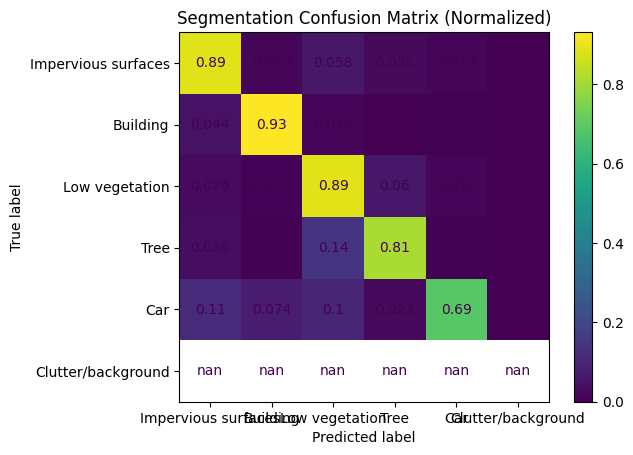

In [5]:
dataset = PotsdamDataset(IMAGE_PATH, LABEL_PATH, patch_size=patch_size, stride=stride, device=DEVICE)
train_loader, val_loader, test_loader = get_data_loaders(dataset, [0.8, 0.1, 0.1] ,batch_size)

model = get_trained_deeplabv3_resnet101(model_path='../models/deeplabv3_resnet101.pth', num_classes=6, device=DEVICE)

evaluate_segmentation(model=model, data_loader=test_loader, device=DEVICE, model_type='DeepLabV3', num_classes=num_classes, eval_path=EVAL_PATH + 'deeplabv3_resnet101.png')

# Train SegFormer

In [ ]:
dataset = PotsdamDataset(IMAGE_PATH, LABEL_PATH, patch_size=patch_size, stride=stride, device=DEVICE)
train_loader, val_loader, test_loader = get_data_loaders(dataset, [0.8, 0.1, 0.1] ,batch_size)

model = get_trained_segformer_model('../models/segformer.pth', num_classes=num_classes, device=DEVICE)

evaluate_segmentation(model=model, data_loader=test_loader, device=DEVICE, model_type='SegFormer', num_classes=num_classes, eval_path=EVAL_PATH + 'segformer.png')